In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Essential imports
# Pandas library helps to perform various functions on the dataframe.
import pandas as pd
# Imported to handle dates and time.
import datetime
# Numpy Provides a fast numerical array structure and helper functions.
import numpy as np
# Will be used for Sampling the dataset.
# from sklearn.cross_validation import StratifiedShuffleSplit
# Libraries used for graphs and plots
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
# Imports to implement various Algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.feature_selection import RFECV
# from sklearn.cross_validation import StratifiedKFold
# from sklearn.cross_validation import train_test_split
# Classifier evaluation tools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

df=pd.read_csv("dataset.csv")
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,NaN,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,NaN,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,NaN,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [2]:
# convert from_date column to date-time
# Note: when we try to convert NaN to date-time, it gets converted to NaT( Not a timestamp )
df['from_date']=pd.to_datetime(df['from_date'])
df['to_date']=pd.to_datetime(df['to_date'])
df['booking_created']=pd.to_datetime(df['booking_created'])
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [3]:
df.set_index(["id"], inplace=True)
df.Cancellation.value_counts()

0    40299
1     3132
Name: Cancellation, dtype: int64

Cancellation,0,1
from_area_id,,
2.0,27,4
6.0,7,0
15.0,6,0
16.0,5,0
17.0,2,0


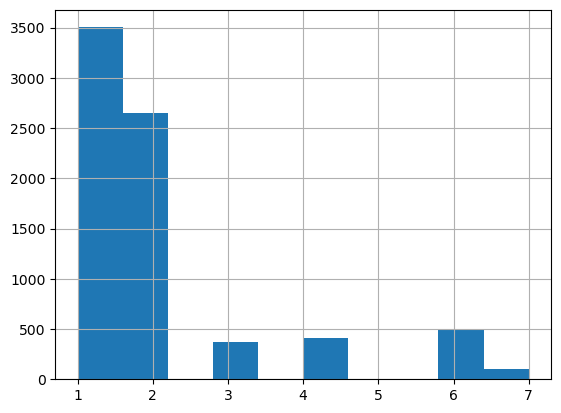

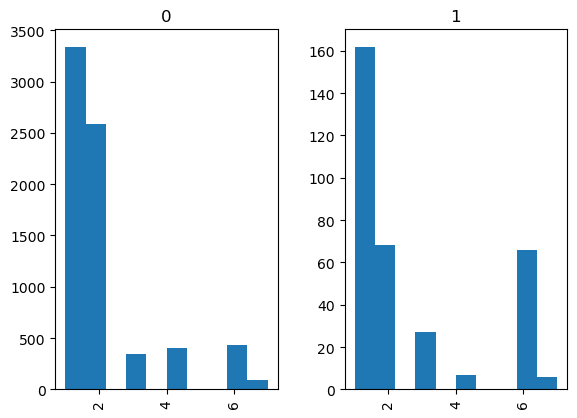

In [4]:
df.package_id.value_counts()
df.package_id.hist()
df.hist(column="package_id",by="Cancellation");
d=pd.crosstab(df.from_area_id,df.Cancellation) 
d.head()

In [5]:
d['percent_cancelled'] = (d[1] / (d[1] + d[0])) * 100.

d.percent_cancelled.sort_values(ascending=False).iloc[:20]
to = df.groupby(['to_area_id', 'Cancellation']).size().unstack(1)

to['percent_cancelled'] = (to[1] / (to[1] + to[0])) * 100.

to.percent_cancelled.sort_values(ascending=False).iloc[:20]

from_to = df.groupby(['from_area_id', 'to_area_id', 'Cancellation']).size()
f_t = from_to.unstack(2)
f_t.head()

Cancellation                0    1
from_area_id to_area_id           
2.0          222.0        1.0  NaN
             393.0       12.0  NaN
             452.0        1.0  NaN
             455.0        NaN  1.0
             572.0        NaN  1.0

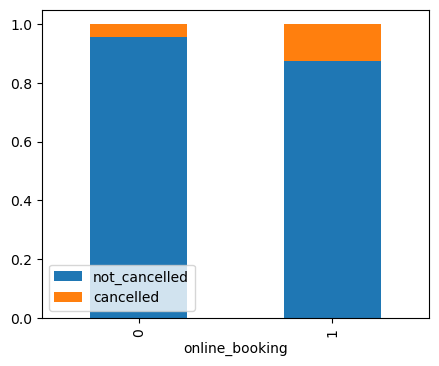

                not_cancelled  cancelled
online_booking                          
0                    0.956358   0.043642
1                    0.875377   0.124623


In [6]:
f_t['percent_cancelled'] = (f_t[1] / (f_t[0] + f_t[1])) * 100.
f_t.percent_cancelled.sort_values(ascending=False).iloc[:20]

# how online or mobile booking affect on cancellation
# Analysing online_booking
ax=pd.crosstab(df.online_booking,df.Cancellation,normalize='index')

ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)


In [7]:
booking_diff = df[['from_date', 'to_date', 'booking_created', 'Cancellation']]
booking_diff.loc[:, 'difference'] = booking_diff.loc[:, ('from_date')] - booking_diff.loc[:, ('booking_created')]
booking_diff.head()
a=np.array(df['from_date'])
a=a.astype('str')

b=[]
for j in a:
    b.append(j.split('T')[0])
print(b[:3])


['2013-01-01', '2013-01-01', '2013-01-01']


C:\Users\vypal\AppData\Local\Temp\ipykernel_8512\2294450250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_diff.loc[:, 'difference'] = booking_diff.loc[:, ('from_date')] - booking_diff.loc[:, ('booking_created')]


In [8]:
time=[]
for i in a:
    time.append(i.split('T')[1])
    
b_day=[]
b_month=[]
b_year=[]
for q in b:
    b_day.append(q.split('-')[2])
    b_month.append(q.split('-')[1])
    b_year.append(q.split('-')[0])
    
time_hours=[]
time_minutes=[]

for w in time:
    time_hours.append(w.split(':')[0])
    time_minutes.append(w.split(':')[1])
    
booking=np.array(df['booking_created'])
booking=booking.astype('str')
x=[]
for j in booking:
    x.append(j.split('T')[0])
booking_time=[]
for i in booking:
    booking_time.append(i.split('T')[1])
booking_day=[]
booking_month=[]
booking_year=[]
for q in x:
    booking_day.append(q.split('-')[2])
    booking_month.append(q.split('-')[1])
    booking_year.append(q.split('-')[0])
bookingtime_hours=[]
bookingtime_minutes=[]

for w in booking_time:
    bookingtime_hours.append(w.split(':')[0])
    bookingtime_minutes.append(w.split(':')[1])

import datetime
difference_days=[]
bookingdate=[]
tripdate=[]
for i in range(len(bookingtime_hours)):
    bookingdate.append(datetime.datetime(int(booking_year[i]),int(booking_month[i]),int(booking_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    tripdate.append(datetime.datetime(int(b_year[i]),int(b_month[i]),int(b_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    diff = tripdate[i] - bookingdate[i]
    days, seconds = diff.days, diff.seconds
    
    difference_days.append(days)
    
print(difference_days[10:20])


[0, 0, 0, 0, 0, 1, 1, 11, 0, 0]


C:\Users\vypal\AppData\Local\Temp\ipykernel_8512\2910336670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_diff['diff_in_days']=difference_days


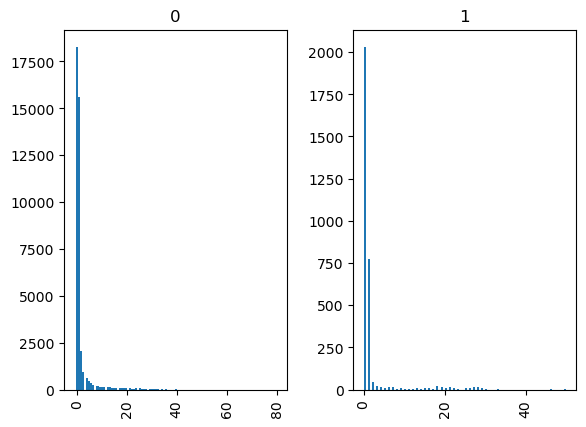

In [9]:
booking_diff['diff_in_days']=difference_days
booking_diff.head(10)

booking_diff.hist(column='diff_in_days', by='Cancellation', bins=100);


In [10]:
booking_diff = df[['from_date', 'to_date', 'booking_created', 'Cancellation']]
booking_diff.loc[:, ('difference')] = booking_diff.loc[:, ('from_date')] - booking_diff.loc[:, ('booking_created')]
booking_diff.head()

a=np.array(df['from_date'])
a=a.astype('str')

b=[]
for j in a:
    b.append(j.split('T')[0])
print(b[:3])

time=[]
for i in a:
    time.append(i.split('T')[1])

time_hours=[]
time_minutes=[]

for w in time:
    time_hours.append(w.split(':')[0])
    time_minutes.append(w.split(':')[1])

booking=np.array(df['booking_created'])
booking=booking.astype('str')
x=[]
for j in booking:
    x.append(j.split('T')[0])
booking_time=[]
for i in booking:
    booking_time.append(i.split('T')[1])
booking_day=[]
booking_month=[]
booking_year=[]
for q in x:
    booking_day.append(q.split('-')[2])
    booking_month.append(q.split('-')[1])
    booking_year.append(q.split('-')[0])
bookingtime_hours=[]
bookingtime_minutes=[]

for w in booking_time:
    bookingtime_hours.append(w.split(':')[0])
    bookingtime_minutes.append(w.split(':')[1])


C:\Users\vypal\AppData\Local\Temp\ipykernel_8512\1545466233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_diff.loc[:, ('difference')] = booking_diff.loc[:, ('from_date')] - booking_diff.loc[:, ('booking_created')]


['2013-01-01', '2013-01-01', '2013-01-01']


In [11]:
import datetime
difference_days=[]
bookingdate=[]
tripdate=[]
for i in range(len(bookingtime_hours)):
    bookingdate.append(datetime.datetime(int(booking_year[i]),int(booking_month[i]),int(booking_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    tripdate.append(datetime.datetime(int(b_year[i]),int(b_month[i]),int(b_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    diff = tripdate[i] - bookingdate[i]
    days, seconds = diff.days, diff.seconds
    
    difference_days.append(days)
    
print(difference_days[10:20])

[0, 0, 0, 0, 0, 1, 1, 11, 0, 0]


C:\Users\vypal\AppData\Local\Temp\ipykernel_8512\1033652044.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_diff.loc[:,('diff_in_days')]=difference_days


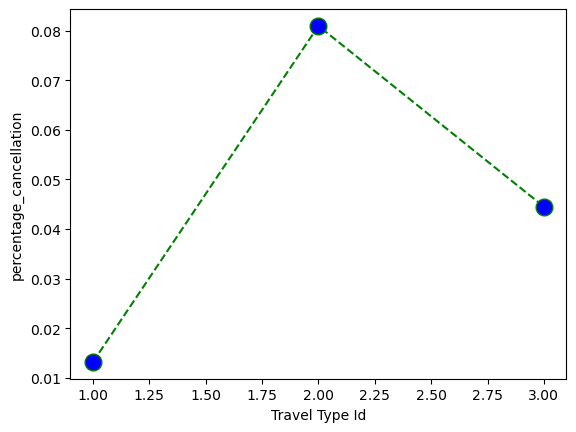

C:\Users\vypal\AppData\Local\Temp\ipykernel_8512\1033652044.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.from_area_id.fillna(-9999, inplace=True)
C:\Users\vypal\AppData\Local\Temp\ipykernel_8512\1033652044.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.to_area_id.fillna(-9999, inplace=True)
C:\Users\vypal\AppData\Local\Temp\ipykernel_8512\1033652044.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe

In [12]:
b_day=[]
b_month=[]
b_year=[]
for q in b:
    b_day.append(q.split('-')[2])
    b_month.append(q.split('-')[1])
    b_year.append(q.split('-')[0])


booking_diff.loc[:,('diff_in_days')]=difference_days


# Analysing travel type id
zc=pd.crosstab(df.travel_type_id,df.Cancellation,normalize='index')
zc.columns=['not_cancelled','cancelled']
plt.plot(zc.index,zc['cancelled'],color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)
plt.xlabel('Travel Type Id')
plt.ylabel('percentage_cancellation')
plt.show()

df.loc[:, 'from_month'] = df.from_date.dt.month
df.loc[:, 'from_weekday'] = df.from_date.dt.weekday
df.loc[:, 'booking_month'] = df.booking_created.dt.month
df.loc[:, 'booking_weekday'] = df.booking_created.dt.weekday
df.loc[:, 'days_before_booking'] = booking_diff['diff_in_days']

feat_cols = ['vehicle_model_id', 'travel_type_id', 'from_area_id',
                 'to_area_id','from_month', 'from_weekday',
                 'days_before_booking', 'online_booking', 'mobile_site_booking',
                 'booking_month', 'booking_weekday']
features = df[feat_cols]
y = df.Cancellation

features.head()
# Replce missing values with (-9999)
features.from_area_id.fillna(-9999, inplace=True)
features.to_area_id.fillna(-9999, inplace=True)


features.from_area_id.fillna(-9999, inplace=True)
features.to_area_id.fillna(-9999, inplace=True)


Train: [    0     1     2 ... 43426 43428 43430] Validation: [    3     8    23 ... 43418 43427 43429]
Train: [    0     2     3 ... 43428 43429 43430] Validation: [    1    17    24 ... 43419 43423 43426]
Train: [    0     1     3 ... 43427 43428 43429] Validation: [    2     6    16 ... 43420 43422 43430]
Train: [    1     2     3 ... 43428 43429 43430] Validation: [    0     7    11 ... 43421 43424 43425]
Train: [    0     1     2 ... 43427 43429 43430] Validation: [    4     5     9 ... 43415 43416 43428]
Train: [    0     1     3 ... 43427 43428 43430] Validation: [    2     7    11 ... 43425 43426 43429]
Train: [    0     1     2 ... 43427 43429 43430] Validation: [    3    17    18 ... 43414 43419 43428]
Train: [    1     2     3 ... 43428 43429 43430] Validation: [    0     8    13 ... 43409 43410 43417]
Train: [    0     1     2 ... 43428 43429 43430] Validation: [    5     6     9 ... 43401 43403 43422]
Train: [    0     2     3 ... 43426 43428 43429] Validation: [    1     4

<Axes: >

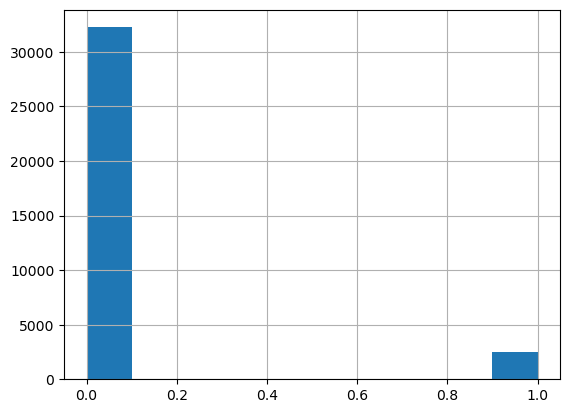

In [13]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
z=0
for train_index, test_index in kf.split(features):
      print("Train:", train_index, "Validation:",test_index)
      Xtr, Xv = features.iloc[train_index], features.iloc[test_index] 
      ytr, yv = y.iloc[train_index], y.iloc[test_index]
      z+=1
print(z)

import matplotlib
import matplotlib.pyplot as plt
colors = ['red','green']
ytr.hist()

[[32253     0]
 [ 2492     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     32253
           1       0.00      0.00      0.00      2492

    accuracy                           0.93     34745
   macro avg       0.46      0.50      0.48     34745
weighted avg       0.86      0.93      0.89     34745



C:\Users\vypal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vypal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vypal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


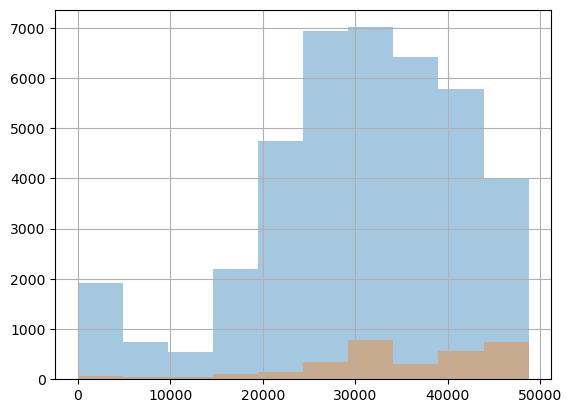

In [15]:
df.groupby('Cancellation').user_id.hist(alpha=.4)

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svc=svclassifier.fit(Xtr, ytr)

y_pred = svclassifier.predict(Xtr)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytr,y_pred))  
print(classification_report(ytr,y_pred))


In [16]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(ytr, y_pred)
print("Accuracy of SVM is:",svm_accuracy)

# Create an array to store results of varios neighbors in KNN.
results = []
from sklearn.neighbors import KNeighborsClassifier

for n in range(1, 51, 2):
    
    knn = KNeighborsClassifier(weights='distance', n_neighbors=n)
    # Train the model on the training data set.
    knn.fit(Xtr, ytr)
    # Predict class labels using our trained model to evaluate the perfomance.
    p = knn.predict(Xv)
    accuracy = metrics.accuracy_score(yv,p)
    results.append([n, accuracy])


Accuracy of SVM is: 0.9282774499928047


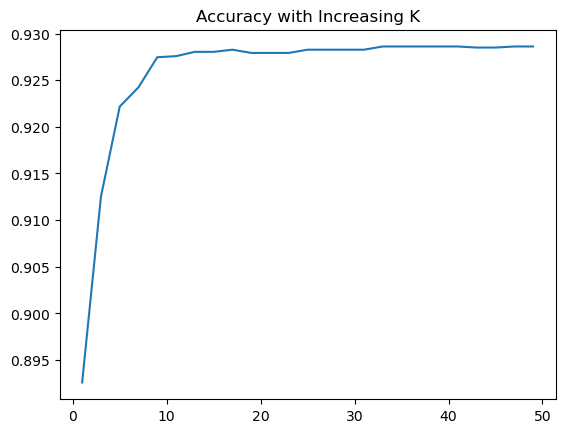

In [17]:
# Store the results into a dataframe
results = pd.DataFrame(results, columns=["n","accuracy"])
knn_accuracy = max(results.accuracy)

pl.plot(results.n,results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()


In [18]:
# Training KNN model for ideal value of Neighbors 'n'.
ideal_n = results.loc[results['accuracy'].idxmax()].n
print('Ideal value of neighbors would be', ideal_n)
ideal_n=int(ideal_n)
knn = KNeighborsClassifier(weights='distance', n_neighbors=ideal_n)
knn.fit(Xtr, ytr)
ytest_pred_knn = knn.predict_proba(Xv)[:, 1]
ytest_preds_threshold = [1 if pred > 0.10 else 0 for pred in ytest_pred_knn]
knn_auc_roc = roc_auc_score(yv, ytest_preds_threshold)

print('Accuracy of KNN model', knn_accuracy)


Ideal value of neighbors would be 33.0
Accuracy of KNN model 0.9286207690536495


In [19]:
# Define a function to calculate and plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Accent):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0.77 0.23]
 [0.48 0.52]]


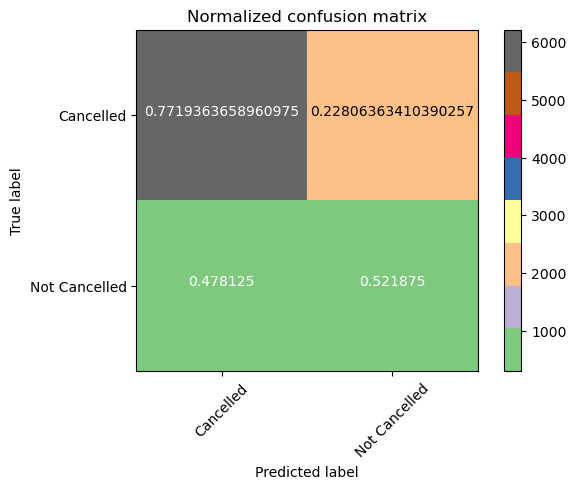

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yv, ytest_preds_threshold)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['Cancelled','Not Cancelled'],
#                       title='Confusion matrix, without normalization')



# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cancelled','Not Cancelled'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [21]:
# Deep learning approach

# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 1: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20


C:\Users\vypal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8602 - loss: 0.3755 - val_accuracy: 0.9270 - val_loss: 0.2407
Epoch 2/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9272 - loss: 0.2585 - val_accuracy: 0.9270 - val_loss: 0.2356
Epoch 3/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9324 - loss: 0.2366 - val_accuracy: 0.9270 - val_loss: 0.2335
Epoch 4/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9282 - loss: 0.2429 - val_accuracy: 0.9270 - val_loss: 0.2311
Epoch 5/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9317 - loss: 0.2292 - val_accuracy: 0.9270 - val_loss: 0.2286
Epoch 6/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9287 - loss: 0.2334 - val_accuracy: 0.9270 - val_loss: 0.2266
Epoch 7/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9288 - loss: 0.2333 - val_accuracy: 0.9270 - val_loss: 0.2260
Epoch 8/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9313 - loss: 0.2229 - val_accuracy: 0.9270 - val_

272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9285 - loss: 0.2108
Test Loss: 0.21474549174308777
Test Accuracy: 0.9288592338562012


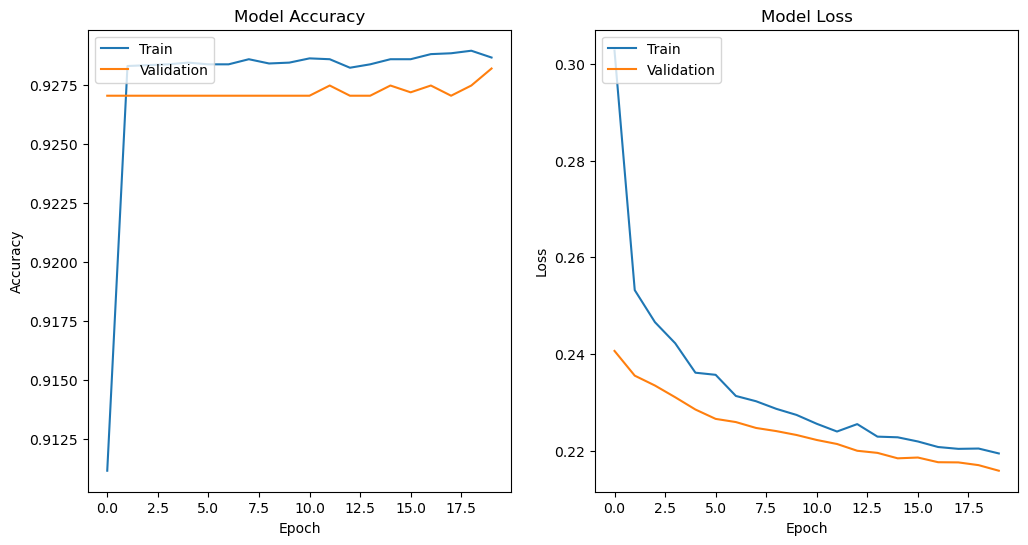

In [23]:
# Step 7: Model Evaluation
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Step 8: Visualize Training History
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Step 9: Fine-tuning (Optional)
# Depending on the evaluation results, fine-tune the model parameters
# This may involve adjusting hyperparameters, changing model architecture, etc.
# For example, you can try adjusting learning rate, batch size, number of epochs, etc.
# Retrain the model with the updated parameters

# Example:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Step 10: Deployment, Monitoring, and Maintenance
# Deploy the model if it meets the desired performance criteria
# Monitor the model's performance in production and update as necessary
# Document the entire process for reproducibility and collaboration


In [24]:
# Fine-tuning the model with adjusted learning rate and a different optimizer
from tensorflow.keras.optimizers import SGD

# Define a new learning rate
learning_rate = 0.001

# Define a new optimizer
optimizer = SGD(learning_rate=learning_rate, momentum=0.9)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Retrain the model with the updated parameters
history_fine_tuned = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the fine-tuned model on the test data
test_loss_fine_tuned, test_accuracy_fine_tuned = model.evaluate(X_test_scaled, y_test)

print("Fine-tuned Test Loss:", test_loss_fine_tuned)
print("Fine-tuned Test Accuracy:", test_accuracy_fine_tuned)


Epoch 1/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9276 - loss: 0.2231 - val_accuracy: 0.9275 - val_loss: 0.2163
Epoch 2/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9277 - loss: 0.2209 - val_accuracy: 0.9275 - val_loss: 0.2164
Epoch 3/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.9282 - loss: 0.2164 - val_accuracy: 0.9275 - val_loss: 0.2164
Epoch 4/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.9302 - loss: 0.2130 - val_accuracy: 0.9275 - val_loss: 0.2161
Epoch 5/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9271 - loss: 0.2212 - val_accuracy: 0.9275 - val_loss: 0.2162
Epoch 6/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9290 - loss: 0.2178 - val_accuracy: 0.9275 - val_loss: 0.2163
Epoch 7/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9302 - loss: 0.2177 - val_accuracy: 0.9275 - val_loss: 0.2161
Epoch 8/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9266 - loss: 0.2209 - val_accuracy

In [25]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Define a custom learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.9  # decrease learning rate by 10% every 10 epochs
    return lr

# Define the model architecture with additional layers and regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer and custom learning rate scheduler
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the model with additional regularization and learning rate scheduling
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, 
                    validation_split=0.2, verbose=1, callbacks=[lr_scheduler_callback])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8525 - loss: 0.3836 - val_accuracy: 0.9270 - val_loss: 0.2395 - learning_rate: 0.0100
Epoch 2/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9277 - loss: 0.2440 - val_accuracy: 0.9270 - val_loss: 0.2357 - learning_rate: 0.0100
Epoch 3/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9286 - loss: 0.2394 - val_accuracy: 0.9270 - val_loss: 0.2337 - learning_rate: 0.0100
Epoch 4/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9291 - loss: 0.2330 - val_accuracy: 0.9270 - val_loss: 0.2307 - learning_rate: 0.0100
Epoch 5/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9285 - loss: 0.2322 - val_accuracy: 0.9270 - val_loss: 0.2332 - learning_rate: 0.0100
Epoch 6/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9295 - loss: 0.2289 - val_accuracy: 0.9270 - val_loss: 0.2295 - learning_rate: 0.0100
Epoch 7/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.2253 - 